In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv("Brent Oil Price_MacroV2.csv")
data["date"] = pd.to_datetime(data["date"])
data.set_index("date", inplace=True)


In [3]:
data

,oil_price,PCE,GDP
date,,,
2000-01-01,26.0,20032,33836
2000-02-01,28.0,20012,33829
2000-03-01,27.0,19972,33816
2000-04-01,23.0,19913,33797
2000-05-01,28.0,19888,33787
...,...,...,...
2024-07-01,NaN,61732,113095
2024-08-01,NaN,62149,113851
2024-09-01,NaN,62497,114572


In [4]:
data1 = data.dropna()
data1.tail()

,oil_price,PCE,GDP
date,,,
2022-10-01,93.0,54117,98665
2022-11-01,91.0,54263,99034
2022-12-01,81.0,54749,99870
2023-01-01,83.0,55454,101423
2023-02-01,83.0,56035,102559


In [5]:
cols = ['oil_price','PCE','GDP']

for col in cols:
    data1[col] = data1[col].astype(int)
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 278 entries, 2000-01-01 to 2023-02-01
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   oil_price  278 non-null    int32
 1   PCE        278 non-null    int32
 2   GDP        278 non-null    int32
dtypes: int32(3)
memory usage: 5.4 KB


C:\Users\A73547\AppData\Local\Temp\ipykernel_15216\664101128.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col] = data1[col].astype(int)


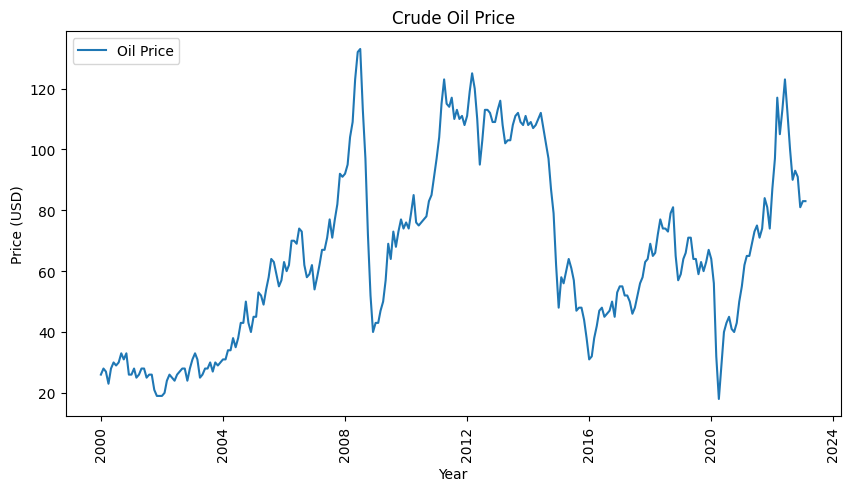

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(data1['oil_price'], label='Oil Price')
plt.title('Crude Oil Price')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.xticks(rotation = 90)
plt.show()

In [9]:
# #Step 3: Split the data into train and test sets
# train_size = int(len(data) * 0.8)
# train, test = data.iloc[:train_size], data.iloc[train_size:]


In [10]:
#Step 4: Create the exogenous variables
# exog_train = pd.read_csv("PCE_GDP.csv")
# exog_test = pd.read_csv("PCE_GDP.csv")
# train = train.merge(exog_train, how="left", left_index=True, right_on="date")
# train.set_index("date", inplace=True)
# test = test.merge(exog_test, how="left", left_index=True, right_on="date")
# test.set_index("date", inplace=True)

In [11]:
# #Step 5: Fit the SARIMAX model with exogenous variables
# model = SARIMAX(train["oil_price"], exog=train[["PCE", "GDP"]], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
# results = model.fit()


In [12]:
# from statsmodels.tsa.stattools import adfuller
# test_result = adfuller (data1['oil_price'])
# print('ADF Statistic: %f' % test_result[0])
# print('p-value: %f' % test_result[1])

In [7]:
# Define the exogenous variables
exog = data1[['PCE', 'GDP']]

In [8]:
# Fit SARIMAX model with exogenous variables
model = sm.tsa.statespace.SARIMAX(data1['oil_price'], exog=exog, order=(1, 0, 0), seasonal_order=(1, 1, 1, 12),enforce_invertibility=False)
results = model.fit()


C:\Users\A73547\Anaconda3\envs\mini_prjct\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\A73547\Anaconda3\envs\mini_prjct\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\A73547\Anaconda3\envs\mini_prjct\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
exog_forecast = data[278:][['PCE', 'GDP']]

In [10]:
fcast = results.predict(len(data1),len(data1)+20,exog=exog_forecast).rename('SARIMAX(1,0,0)(1,1,1,12) Forecast')

In [11]:
fcast

2023-03-01     89.588390
2023-04-01     90.058038
2023-05-01     97.146599
2023-06-01    102.781791
2023-07-01    102.412061
2023-08-01    100.701271
2023-09-01    101.919159
2023-10-01    105.313057
2023-11-01    105.299277
2023-12-01    104.354407
2024-01-01    107.674780
2024-02-01    111.801543
2024-03-01    117.275223
2024-04-01    118.821557
2024-05-01    125.718718
2024-06-01    130.879200
2024-07-01    130.468843
2024-08-01    129.360131
2024-09-01    130.590556
2024-10-01    135.215471
2024-11-01    134.261296
Freq: MS, Name: SARIMAX(1,0,0)(1,1,1,12) Forecast, dtype: float64

In [12]:
pd.Series(fcast)

2023-03-01     89.588390
2023-04-01     90.058038
2023-05-01     97.146599
2023-06-01    102.781791
2023-07-01    102.412061
2023-08-01    100.701271
2023-09-01    101.919159
2023-10-01    105.313057
2023-11-01    105.299277
2023-12-01    104.354407
2024-01-01    107.674780
2024-02-01    111.801543
2024-03-01    117.275223
2024-04-01    118.821557
2024-05-01    125.718718
2024-06-01    130.879200
2024-07-01    130.468843
2024-08-01    129.360131
2024-09-01    130.590556
2024-10-01    135.215471
2024-11-01    134.261296
Freq: MS, Name: SARIMAX(1,0,0)(1,1,1,12) Forecast, dtype: float64

<AxesSubplot: title={'center': 'Oil Price Forecast'}, xlabel='date'>

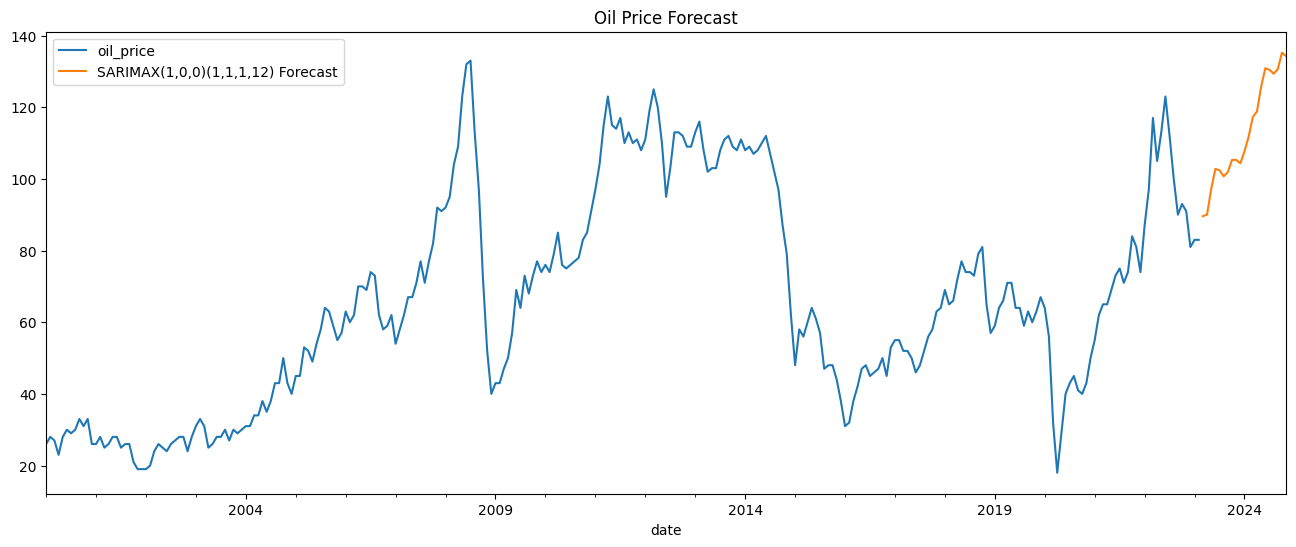

In [13]:
title='Oil Price Forecast'
ylabel='Oil Price'
xlabel=''

data1['oil_price'].plot(legend=True,figsize=(16,6),title=title)
pd.Series(fcast).plot(legend=True)


In [14]:
#Testing Accuracy: Divide into train- test and foreacast on the test data
train = data1[:266]
test = data1[266:]

In [15]:
train.tail()

,oil_price,PCE,GDP
date,,,
2021-10-01,84,53385,98195
2021-11-01,81,53697,98915
2021-12-01,74,53974,99572
2022-01-01,87,54111,100164
2022-02-01,97,54365,100637


In [16]:
test.tail()

,oil_price,PCE,GDP
date,,,
2022-10-01,93,54117,98665
2022-11-01,91,54263,99034
2022-12-01,81,54749,99870
2023-01-01,83,55454,101423
2023-02-01,83,56035,102559


In [17]:
# Define SARIMAX model with exogenous variables
model = sm.tsa.SARIMAX(train['oil_price'], exog=train[['PCE', 'GDP']], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

C:\Users\A73547\Anaconda3\envs\mini_prjct\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\A73547\Anaconda3\envs\mini_prjct\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [18]:
# Fit the model
model_fit = model.fit()

C:\Users\A73547\Anaconda3\envs\mini_prjct\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
# Make predictions on test set
preds = model_fit.forecast(steps=len(test), exog=test[['PCE', 'GDP']])


In [20]:
preds

2022-03-01    95.312008
2022-04-01    91.296529
2022-05-01    89.368043
2022-06-01    86.856311
2022-07-01    85.967670
2022-08-01    82.101540
2022-09-01    79.992723
2022-10-01    77.264567
2022-11-01    75.614639
2022-12-01    75.468342
2023-01-01    83.920927
2023-02-01    90.352240
Freq: MS, Name: predicted_mean, dtype: float64

In [21]:
# Calculate MAPE for test set
test_mape = (abs(preds - test['oil_price']) / test['oil_price']).mean() * 100

# print('Training MAPE:', train_mape)
print('Test MAPE:', test_mape)

Test MAPE: 15.397542953322136
